### Linear Regression


More generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the **bias term** (also called the intercept term): 

$$
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \dots + \theta_nx_n$$


In this equation:

* $\hat{y}$ is the predicted value.

* $n$ is the number of features.

* $x_i$ is the $i^{th}$ feature value.

* $θ_j$ is the $j^{th}$ model parameter (including the bias term $θ_0$ and the feature weights $θ_1$, $θ_2$, $\dots$,  $θ_n$).


This can be written much more concisely using a vectorized form:

$$
\hat{y} = h_0(x) = \mathbf{\theta^T}\cdot\mathbf{x}
$$


* $\textbf{θ}$ is the model's parameter vector, containing the bias term $θ_0$ and the feature weights $θ_1$ to $θ_n$ (column vector).

* $x$ is the instance's feature vector, containing $x_0$ to $x_n$, with $x_0$ always equal to $1$ (column vector).

* $\mathbf{\theta^T}\cdot\mathbf{x}$ is the dot product of the vectors $\mathbf{θ}$ and $\mathbf{x}$, which is of course equal to $θ_0x_0$ + $θ_1x_1$ + $θ_2x_2$ + $\dots$ + $θ_nx_n$.

* $h(\theta)$ is the hypothesis function, using the model parameters $\theta$.

#### MSE cost function for a Linear Regression model


$$
MSE(\mathbf{x}, h_{\theta}) =  MSE(\mathbf{\theta}) = \frac{1}{m}\sum_{i=1}^{m}(\mathbf{\theta^T}\mathbf{x^{(i)}} - y^{(i)})^2
$$


#### Normal equation 

$$
\mathbf{\hat{\theta}} = (\mathbf{X^T}\mathbf{X})^{-1}X^Ty
$$

* $\mathbf{\hat{\theta}}$ is the value of $\theta$ that minimizes the cost function.
* is the vector of target values containing $y^{(1)}$ to $y^{(m)}$.


Let's generate some linear-looking data: 

Text(0, 0.5, 'y')

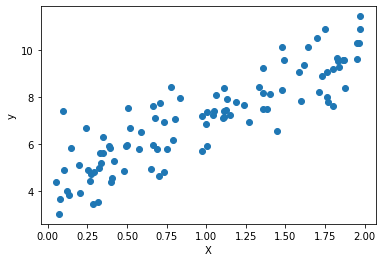

In [1]:
import numpy as np
from matplotlib import pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

In [2]:
X[:2], y[:2]

(array([[0.73072192],
        [0.70658841]]),
 array([[4.79373801],
        [7.7639502 ]]))

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance


In [4]:
X[:2]

array([[0.73072192],
       [0.70658841]])

In [5]:
X_b[:2]

array([[1.        , 0.73072192],
       [1.        , 0.70658841]])

use the `inv()` function from NumPy's linear algebra module (`np.linalg`) to compute the inverse of a matrix, and the `dot()` method for matrix multiplication

In [6]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.26652558],
       [2.8610686 ]])

$y = 4 + 3x_1 + \textrm{GaussianNoise}$, but lets see that happens without noise.

Text(0, 0.5, 'y_0')

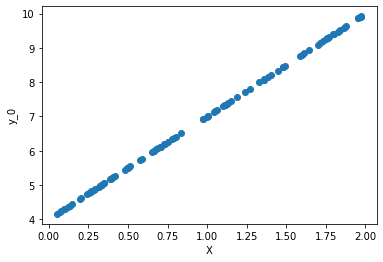

In [7]:
y_0 = 4 + 3 * X
plt.scatter(X, y_0)
plt.xlabel('X')
plt.ylabel('y_0')

In [8]:
theta_best_0 = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_0)
theta_best_0

array([[4.],
       [3.]])

Lets make predictions using $\mathbf{\theta}$:

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.26652558],
       [9.98866277]])

Let's plot this model's predictions

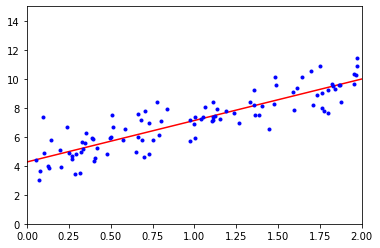

In [10]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Performing Linear Regression using Scikit-Learn is simple 

(Note that Scikit-Learn separates the bias term (`intercept_`) from the feature weights (`coef_`))


In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.26652558]), array([[2.8610686]]))

In [12]:
theta_best

array([[4.26652558],
       [2.8610686 ]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for “least squares”), which one can call directly

In [13]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)


In [14]:
theta_best_svd

array([[4.26652558],
       [2.8610686 ]])

In [15]:
residuals

array([87.70256372])

In [16]:
rank

2

In [17]:
s

array([14.63516195,  4.08000218])

This function computes $\mathbf{\theta}$, where  is the pseudoinverse of $\mathbf{X}$ (specifically, the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [18]:
np.linalg.pinv(X_b).dot(y)

array([[4.26652558],
       [2.8610686 ]])

The pseudoinverse itself is computed using a Standard Matrix Factorization technique called **Singular Value Decomposition (SVD)** that can decompose the training set matrix $\mathbf{X}$ into the matrix multiplication of three matrices $\mathbf{U}\mathbf{\Sigma}\mathbf{V}^T$, (see `numpy.linalg.svd()`). The pseudoinverse is computed as $\mathbf{X}^+ = \mathbf{V}\mathbf{\Sigma}^+\mathbf{U}^T$. 

To compute the matrix $\mathbf{\Sigma}^+$, the algorithm takes $\mathbf{\Sigma}$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the nonzero values with their inverse, and finally it transposes the resulting matrix. This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix $\mathbf{X}^T\mathbf{X}$ is not invertible (i.e., singular), such as if $m < n$ or if some features are redundant, but the pseudoinverse is always defined.

#### Gradient Descent

##### Batch Gradient Descent

Lets look at the gradient of the cost function for Linear Regression (MSE): 

$$
\frac{\partial}{\partial \theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m}\big(\mathbf{\theta}^T\mathbf{x}^{(i)} - y^{(i)}\big)x_j^{(i)}
$$

therefore: 

$$
\nabla_\theta(MSE(\theta)) = \begin{pmatrix}
                              \frac{\partial}{\partial \theta_0} MSE(\theta) \\
                              \frac{\partial}{\partial \theta_1} MSE(\theta) \\
                              \vdots \\
                              \frac{\partial}{\partial \theta_m} MSE(\theta) \\
                              \end{pmatrix} =
                               \frac{2}{m} \mathbf{X}^T(\mathbf{X}\mathbf{\theta} - y) 
$$

This formula involves calculations over the full training set $\mathbf{X}$, at each Gradient Descent step! This is why the algorithm is called *Batch Gradient Descent*: it uses the whole batch of training data at every step (actually, *Full Gradient Descent* would probably be a better name). As a result it is terribly slow on very large training sets (but we will see much faster Gradient Descent algorithms shortly). 
However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.


Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting $\nabla_\theta(MSE(\theta))$ from $\theta$. This is where the learning rate $\eta$ comes into play: multiply the gradient vector by $\eta$ to determine the size of the downhill step: 

$$
\theta^{\textrm(next step)} = \theta - \eta\nabla_\theta(MSE(\theta))
$$
                               

In [19]:
eta = 0.1
n_iterations = 1000
m = 100

theta_g = np.random.randn(2,1) # random initialization

for i in range(n_iterations):
    gradients =  2/m*X_b.T.dot(X_b.dot(theta_g) - y)
    theta_g = theta_g -eta*gradients
    
theta_g

array([[4.26652558],
       [2.8610686 ]])

In [20]:
theta_best

array([[4.26652558],
       [2.8610686 ]])

One may wonder how to set the number of iterations. If it is too low, you will still be far away from the optimal solution when the algorithm stops; but if it is too high, you will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number $\epsilon$ (called the tolerance) — because this happens when Gradient Descent has (almost) reached the minimum.

-----------------

When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while: it can take $\mathcal{O}(1/\epsilon)$ iterations to reach the optimum within a range of $\epsilon$, depending on the shape of the cost function. If you divide the tolerance by 10 to have a more precise solution, then the algorithm may have to run about 10 times longer.

#### Stochastic Gradient Descent


When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.

Therefore, randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is akin to *simulated annealing*, an algorithm inspired from the process in metallurgy of *annealing*, where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

This code implements Stochastic Gradient Descent using a simple learning schedule:



In [21]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters
m = 100

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients


In [22]:
theta

array([[4.2706785 ],
       [2.86513316]])

Note that since instances are picked randomly, some instances may be picked several times per epoch, while others may not be picked at all. If you want to be sure that the algorithm goes through every instance at each epoch, another approach is to shuffle the training set (making sure to shuffle the input features and the labels jointly), then go through it instance by instance, then shuffle it again, and so on. However, this approach generally converges more slowly.


When using Stochastic Gradient Descent, the training instances must be independent and identically distributed (IID) to ensure that the parameters get pulled toward the global optimum, on average. A simple way to ensure this is to shuffle the instances during training (e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch). If you do not shuffle the instances - for example, if the instances are sorted by label —then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum.

Lets look at the loss function (SME) as number the number of epochs:

In [23]:
# mse = 1/m*sum(y_pred - y_true)^2

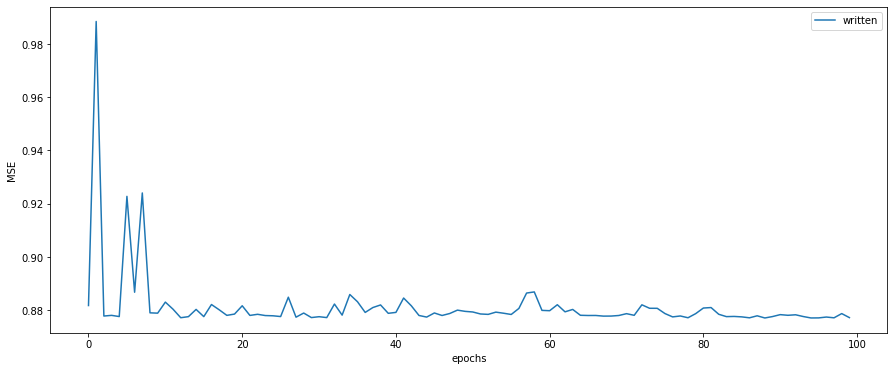

In [24]:
n_epochs = 100 # learning rate
t0, t1 = 5, 50  # learning schedule hyperparameters
m = 100

def learning_schedule(t):
    return t0 / (t + t1)

epochs = [] 
mse = []
# mse_scikit = []

theta = np.random.randn(2,1)  # random initialization
for epoch in range(n_epochs):
    # shuffle_index = np.random.randint(0, y.shape[0], y.shape[0])
    # y = y[shuffle_index]
    # X_b = X_b[shuffle_index]
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    
    y_pred = X_b.dot(theta)
    loss = 1/m*sum((y_pred - y)**2)

    # mse_scikit.append(mean_squared_error(y_true=y, y_pred=y_pred))
    epochs.append(epoch)
    mse.append(loss)
    
plt.figure(figsize=(15,6))    
plt.plot(epochs, mse, label='written')
# plt.plot(epochs, mse_scikit, label='scikit')
# plt.plot(epochs, np.array([i[0] for i in mse]) - np.array(mse_scikit), label='diff')
plt.xlabel('epochs')
plt.ylabel('MSE')
# plt.yscale('log')
plt.legend()

To perform Linear Regression using Stochastic GD with Scikit-Learn, you can use the `SGDRegressor` class, which defaults to optimizing the squared error cost function. The following code runs for maximum 1,000 epochs or until the loss drops by less than `0.001` during one epoch (`max_iter=1000`, `tol=1e-3`). It starts with a learning rate of `0.1` (`eta0=0.1`), using the default learning schedule (different from the preceding one). Lastly, it does not use any regularization (`penalty=None`):

In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [26]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.25535985]), array([2.85604174]))

### Mini-batch Gradient Descent


The last Gradient Descent algorithm we will look at is called Mini-batch Gradient Descent. It is simple to understand once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

The algorithm’s progress in parameter space is less erratic than with Stochastic GD, especially with fairly large mini-batches. As a result, Mini-batch GD will end up walking around a bit closer to the minimum than Stochastic GD—but it may be harder for it to escape from local minima (in the case of problems that suffer from local minima, unlike Linear Regression). Figure below shows the paths taken by the Gradient Descent algorithms in parameter space during training. They all end up near the minimum, but Batch GD’s path actually stops at the minimum, while both Stochastic GD and Mini-batch GD continue to walk around. However, don’t forget that Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.

In [27]:
theta_path_mgd = []

n_iterations = 200
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
theta_path_mgd = np.array(theta_path_mgd).reshape(1000,2)        

In [28]:
len(theta_path_mgd)

1000

In [29]:
eta = 0.1
n_iterations = 1000
m = 100

theta_g = np.random.randn(2,1) # random initialization

thetas_g = []
for i in range(n_iterations):
    gradients =  2/m*X_b.T.dot(X_b.dot(theta_g) - y)
    theta_g = theta_g - eta*gradients
    thetas_g.append(theta_g)

thetas_g = np.array(thetas_g).reshape(1000, 2)

n_epochs = 1000
t0, t1 = 5, 50  # learning schedule hyperparameters
m = 100

def learning_schedule(t):
    return t0 / (t + t1)

theta_sg = np.random.randn(2,1)  # random initialization
thetas_sg = []
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta_sg) - yi)
        eta = learning_schedule(epoch * m + i)
        theta_sg = theta_sg - eta * gradients
    thetas_sg.append(theta_sg)
thetas_sg = np.array(thetas_sg).reshape(1000, 2)

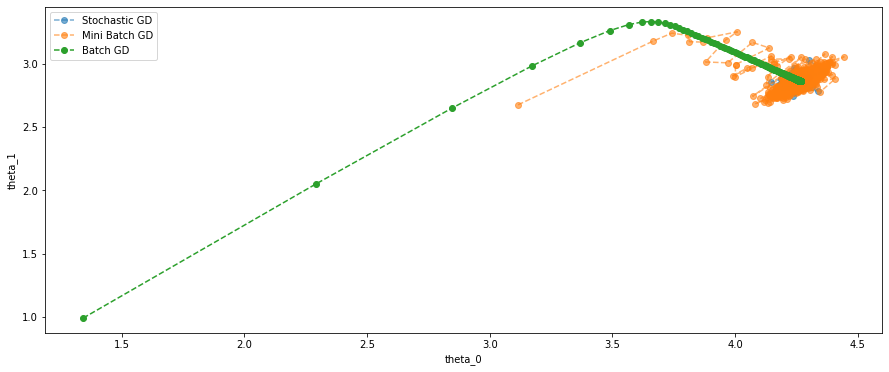

In [30]:
plt.rcParams['text.usetex'] = False
fig = plt.figure(figsize=(15,6))
plt.plot(thetas_sg[:,0], thetas_sg[:,1], '--o', label='Stochastic GD', alpha=0.6)
plt.plot(theta_path_mgd[:,0], theta_path_mgd[:,1], '--o', label='Mini Batch GD', alpha=0.6)
plt.plot(thetas_g[:,0], thetas_g[:,1], '--o', label='Batch GD')
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.legend()

### Polynomial Regression


A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

In [31]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [32]:
X[:3], y[:3]

(array([[-0.81196254],
        [-1.40940403],
        [ 2.7794682 ]]),
 array([[0.70347596],
        [2.79237951],
        [9.56259167]]))

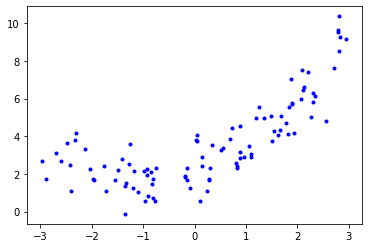

In [33]:
plt.plot(X, y, 'b.')

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s `PolynomialFeatures` class to transform our training data, adding the square (second-degree polynomial) of each feature in the training set as a new feature (in this case there is just one feature):

In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)
X_poly[:3]

array([[-0.81196254,  0.65928316],
       [-1.40940403,  1.98641972],
       [ 2.7794682 ,  7.72544347]])

Now you can fit a LinearRegression model to this extended training data

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.14644664]), array([[0.94469163, 0.46465632]]))

In [36]:
X[:3].shape

(3, 1)

In [37]:
y_pred = lin_reg.predict(poly_features.transform(np.linspace(-3, 3, 100).reshape(100, 1)))

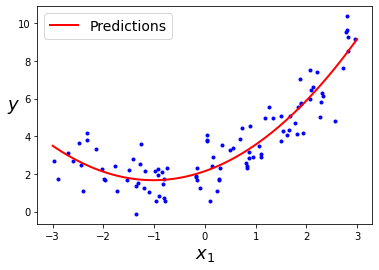

In [38]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

`PolynomialFeatures(degree=d)` transforms an array containing $n$ features into an array containing $(n + d)! / d!n!$ features, where $n!$ is the factorial of $n$, equal to 1 × 2 × 3 × ⋯ × n. Beware of the combinatorial explosion of the number of features!

(-3.0, 3.0, 0.0, 10.0)

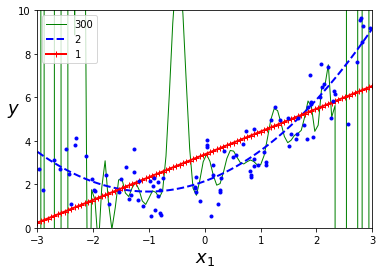

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])


### Learning Curves


If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.

Another way to tell is to look at the learning curves: these are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration). To generate the plots, train the model several times on different sized subsets of the training set. The following code defines a function that, given some training data, plots the learning curves of a model:



In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y, title=None):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.figure(figsize=(15,6))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel('train instances size', fontsize=13)
    plt.ylabel('RMSE', fontsize=13)
    plt.axis([0,80 ,0,3 ])
    if title:
        plt.title(title)
    plt.legend()

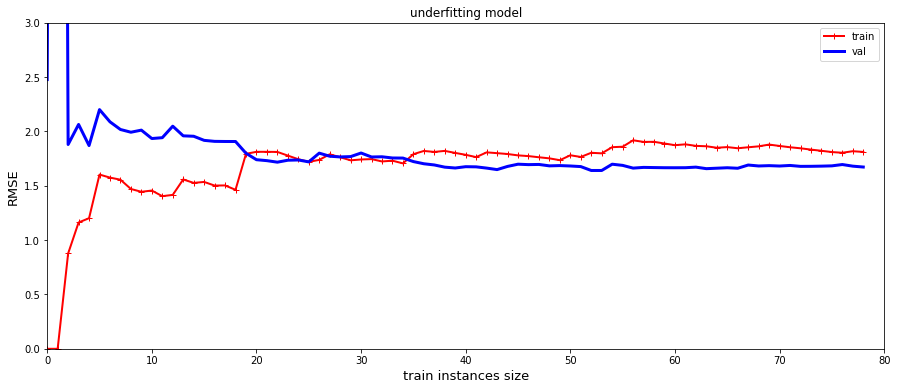

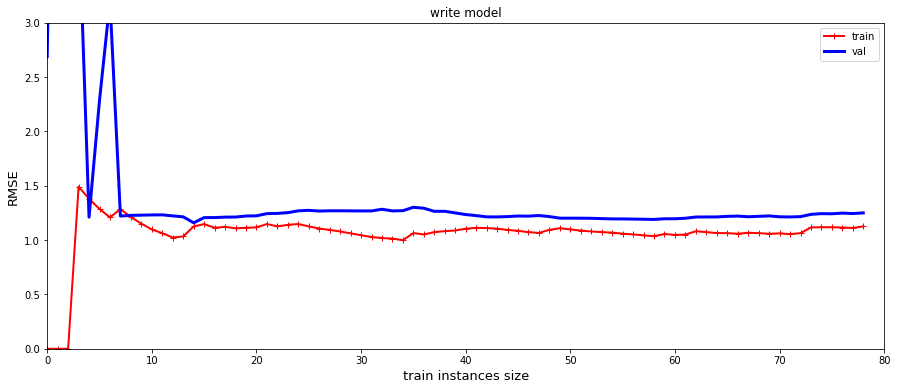

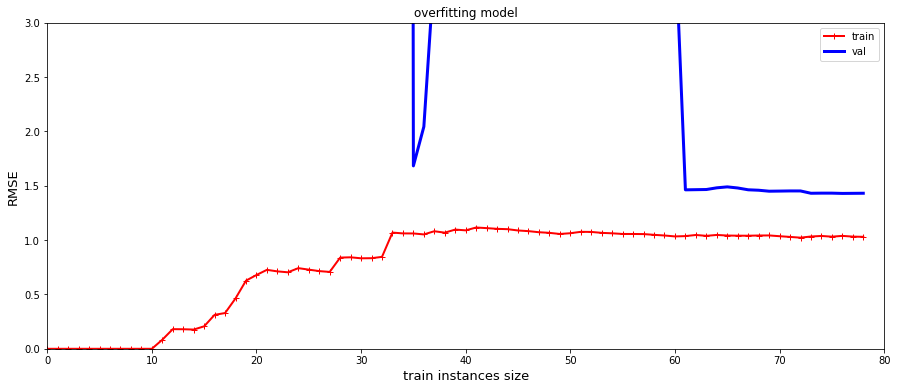

In [41]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# underfitting method
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y, 'underfitting model')

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_poly, y, 'write model')


polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y, 'overfitting model')


This model that’s underfitting deserves a bit of explanation. First, let’s look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse. Now let’s look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then, as the model is shown more training examples, it learns, and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

These learning curves are typical of a model that’s underfitting. Both curves have reached a plateau; they are close and fairly high.

If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.


About the overfitting model: 
--------------
These learning curves look a bit like the previous ones, but there are two very important differences:

* The error on the training data is much lower than with the Linear Regression model.

* There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. If you used a much larger training set, however, the two curves would continue to get closer.






## Regularized Linear Models


For a linear model, regularization is typically achieved by constraining the weights of the model. Lets look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.


### Ridge Regression

Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to $\alpha\sum_i^n\theta_i^2$ is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to use the unregularized performance measure to evaluate the model’s performance.


**NOTE**

It is quite common for the cost function used during training to be different from the performance measure used for testing. Apart from regularization, another reason they might be different is that a good training cost function should have optimization-friendly derivatives, while the performance measure used for testing should be as close as possible to the final objective. For example, classifiers are often trained using a cost function such as the log loss (discussed in a moment) but evaluated using precision/recall.


The hyperparameter α controls how much you want to regularize the model. If α = 0, then Ridge Regression is just Linear Regression. If α is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean: 

$$
J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + \alpha\frac{1}{2}\sum_{i=1}^n\theta_i^2
$$

the bias term $\theta_0$ is not regularized (the sum starts at $i=1$, not $0$). If we define $\mathbf{w}$ as the vector of feature weights ($\theta_1$ to $\theta_n$), then the regularization term is equal to $1/2(|| w ||_2)^2$, where $|| w ||_2$ represents the $\ell_2$ norm of the weight vector. For Gradient Descent, just add $\alpha \mathbf{w}$ to the MSE gradient vector above.


**NOTE**

It is important to scale the data (e.g., using a `StandardScaler`) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

Lets see several Ridge models trained on some linear data using different $\alpha$ values. 

Note: 



$$
y = 1 + \frac{1}{2}x + \textrm{flat-noise}
$$

In [42]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [43]:
X[:1], y[:1]

(array([[1.12362036]]), array([[0.88658943]]))

In [44]:
X.shape, y.shape, X_new.shape

((20, 1), (20, 1), (100, 1))

'cholesky' uses the standard scipy.linalg.solve function to obtain a closed-form solution.

In [45]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42) # closed form equation
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

`sag` uses a Stochastic Average Gradient descent, and `saga` uses
its improved, unbiased version named SAGA. Both methods also use an
iterative procedure, and are often faster than other solvers when
both `n_samples` and `n_features` are large. Note that `sag` and
`saga` fast convergence is only guaranteed on features with
approximately the same scale. You can preprocess the data with a
scaler from `sklearn.preprocessing`.

In [46]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

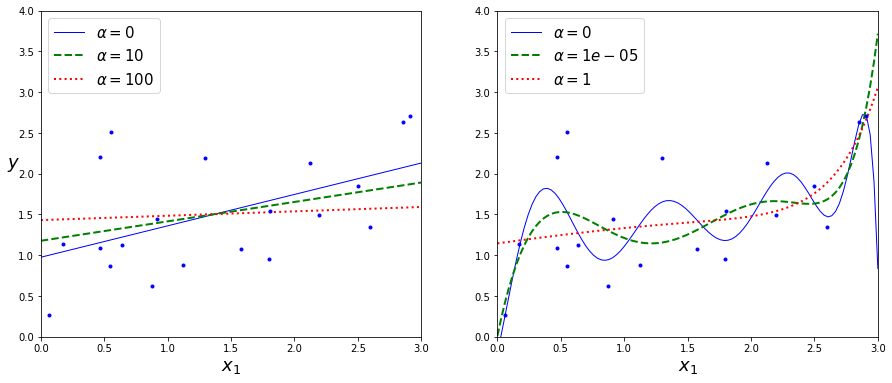

In [47]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])
    
plt.figure(figsize=(15,6))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)    

On the left, plain `Ridge` models are used, leading to linear predictions. On the right, the data is first expanded using `PolynomialFeatures(degree=10)`, then it is scaled using a `StandardScaler`, and finally the Ridge models are applied to the resulting features: this is Polynomial Regression with Ridge regularization. Note how increasing $\alpha$ leads to flatter (i.e., less extreme, more reasonable) predictions, thus reducing the model's variance but increasing its bias.


As with Linear Regression, one can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent. The pros and cons are the same. The closed-form solution equation is 

$$
\hat{\mathbf{\theta}} = (\mathbf{X^T}X + \alpha\mathbf{A})^{-1}X^Ty
$$

where $\mathbf{A}$ is the $(n + 1) \times (n + 1)$ identity matrix, except with a 0 in the top-left cell, corresponding to the bias term.


Here is how to perform Ridge Regression with Scikit-Learn using a closed-form solution (a variant of above equation that uses a matrix factorization technique by André-Louis Cholesky):

In [48]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42) # closed form equation
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

And using Stochastic Gradient Descent:

In [49]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

Alternatively you can use the Ridge class with the `"sag"` solver. Stochastic Average GD is a variant of Stochastic GD.

The penalty hyperparameter sets the type of regularization term to use. Specifying `"l2"` indicates that you want SGD to add a regularization term to the cost function equal to half the square of the $\ell_2$ norm of the weight vector: this is simply Ridge Regression.


### Lasso Regression


*Least Absolute Shrinkage and Selection Operator Regression* (usually simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the $\ell_1$ norm of the weight vector instead of half the square of the $\ell_2$ norm: 


$$
J(\mathbf{\theta} = MSE(\mathbf{\theta}) + \alpha\sum_{i=1}^{n}|\theta_i|
$$

------------ 

Note: Lets remember $\ell_1$ and $\ell_2$ norm: 

* Computing the root of a sum of squares (RMSE) corresponds to the Euclidean norm: this is the notion of distance you are familiar with. It is also called the $\ell_2$ norm, noted $|| · ||_2$ (or just $|| · ||$).

* Computing the sum of absolutes (MAE) corresponds to the $\ell_1$ norm, noted $|| · ||_1$. This is sometimes called the Manhattan norm because it measures the distance between two points in a city if you can only travel along orthogonal city blocks.

* More generally, the $\ell_k$ norm of a vector $v$ containing $n$ elements is defined as 

$$
||v||_k = (|v_0|_k + |v_1|_k + \dots + |v_n|_k)^{1/k}.
$$ 

$\ell_0$ gives the number of nonzero elements in the vector, and $\ell_{\inf}$ gives the maximum absolute value in the vector.

* The higher the norm index, the more it focuses on large values and neglects small ones. This is why the RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.

--------------

Lets do the same regression but replace Ridge models with Lasso models and uses smaller $\alpha$ values:



/Users/valdirsalustino/Documents/git/ml-studies/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


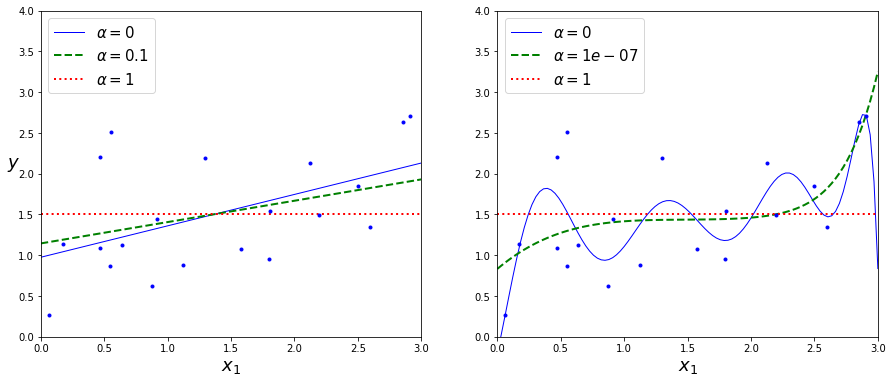

In [50]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(15,6))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)


An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero). For example, the dashed line in the righthand plot of above figure (with $\alpha = 10^{-7}$) looks roughly cubic: all the weights for the high-degree polynomial features are equal to zero. In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).


You can get a sense of why this is the case by looking at the following plot: 

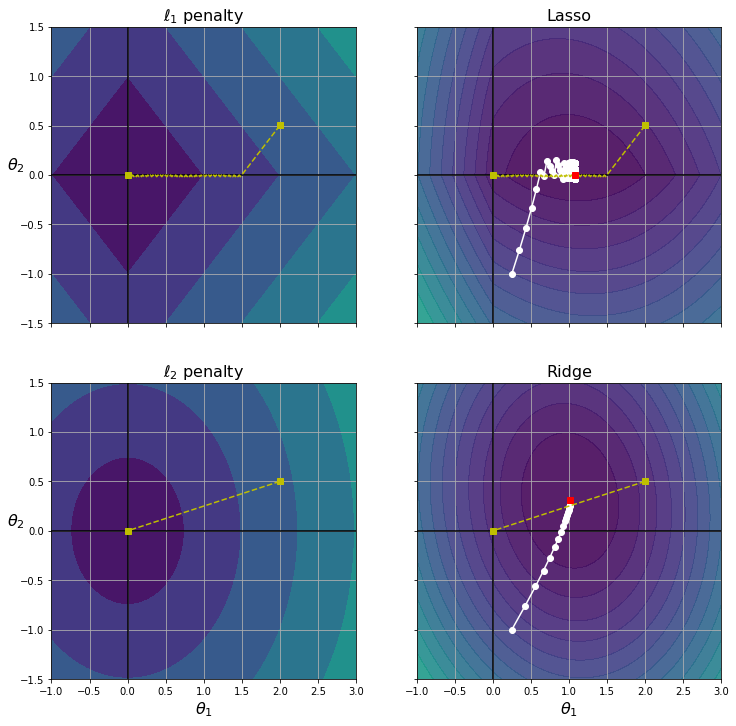

In [51]:
%matplotlib inline

def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 12))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)




the axes represent two model parameters, and the background contours represent different loss functions. In the top-left plot, the contours represent the $\ell_1$ loss ($|\theta_1|$ + $|\theta_2|$), which drops linearly as you get closer to any axis. For example, if you initialize the model parameters to $\theta_1 = 2$ and $\theta_2 = 0.5$, running Gradient Descent will decrement both parameters equally (as represented by the dashed yellow line); therefore $\theta_2$ will reach $0$ first (since it was closer to $0$ to begin with). After that, Gradient Descent will roll down the gutter until it reaches $\theta_1 = 0$ (with a bit of bouncing around, since the gradients of $\ell_1$ never get close to $0$: they are either –1 or 1 for each parameter). In the top-right plot, the contours represent Lasso's cost function (i.e., an MSE cost function plus an $\ell_1$ loss). The small white circles show the path that Gradient Descent takes to optimize some model parameters that were initialized around $\theta_1 = 0.25$ and $\theta_2 = –1$: notice once again how the path quickly reaches $\theta_2 = 0$, then rolls down the gutter and ends up bouncing around the global optimum (represented by the red square). If we increased $\alpha$, the global optimum would move left along the dashed yellow line, while if we decreased $\alpha$, the global optimum would move right (in this example, the optimal parameters for the unregularized MSE are $\theta_1 = 2$ and $\theta_2 = 0.5$).


The two bottom plots show the same thing but with an $\ell_2$ penalty instead. In the bottom-left plot, you can see that the $\ell_2$ loss decreases with the distance to the origin, so Gradient Descent just takes a straight path toward that point. In the bottom-right plot, the contours represent Ridge Regression's cost function (i.e., an MSE cost function plus an $\ell_2$ loss). There are two main differences with Lasso. First, the gradients get smaller as the parameters approach the global optimum, so Gradient Descent naturally slows down, which helps convergence (as there is no bouncing around). Second, the optimal parameters (represented by the red square) get closer and closer to the origin when you increase $\alpha$, but they never get eliminated entirely.

----------
To avoid Gradient Descent from bouncing around the optimum at the end when using Lasso, you need to gradually reduce the learning rate during training (it will still bounce around the optimum, but the steps will get smaller and smaller, so it will converge).

---------


The Lasso cost function is not differentiable at $\theta_i = 0$ (for $i = 1, 2, \cdots, n$), but Gradient Descent still works fine if you use a subgradient vector $\mathbf{g}$ instead when any $\theta_i = 0$. You can think of a subgradient vector at a nondifferentiable point as an intermediate vector between the gradient vectors around that point.

Equation below shows a subgradient vector equation you can use for Gradient Descent with the Lasso cost function: 

$$
\mathbf{g}(\theta, J) = \nabla_{\theta} MSE(\mathbf{\theta}) + \alpha \begin{pmatrix}
                              sign(\theta_0) \\
                              sign(\theta_1) \\
                              \vdots \\
                              sign(\theta_n) \\
                              \end{pmatrix}, \  \text{where} \  sign(\theta_i) = \begin{cases}
                                                                                      -1 & \textrm{if}\  \theta_i < 0 \\    
                                                                                      0 & \textrm{if}\  \theta_i = 0 \\    
                                                                                      +1 & \textrm{if}\  \theta_i > 0 \\    
                                                                                   \end{cases}
$$

Here is a small Scikit-Learn example using the `Lasso` class:

In [52]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

Note that you could instead use `SGDRegressor(penalty="l1")`.



### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio $r$. When $r = 0$, Elastic Net is equivalent to Ridge Regression, and when $r = 1$, it is equivalent to Lasso Regression: 

$$
J(\mathbf{\theta}) = \text{MSE}(\mathbf{\theta}) + r\alpha\sum_{i=1}^n|\theta_i| + \frac{1-r}{2}\alpha\sum_{i=1}^n\theta_i^2
$$


So when should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net? 

It is almost always preferable to have at least a little bit of regularization, so generally you should **avoid** plain Linear Regression. **Ridge is a good default**, but if you suspect that only a few features are useful, you should prefer **Lasso or Elastic Net** because they tend to reduce the useless features'  weights down to zero, as we have discussed. In general, **Elastic Net is preferred over Lasso** because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

Here is a short example that uses Scikit-Learn's ElasticNet (`l1_ratio` corresponds to the mix ratio `r`):

In [53]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early Stop

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping. 

In [54]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [55]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [56]:
minimum_val_error, best_epoch, best_model

(1.3513110512453865,
 239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

Text(0, 0.5, 'RMSE')

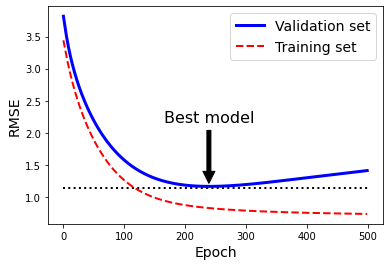

In [57]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
# plt.figure(figsize=(8,6))
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
# plt.show()

Figure above shows a complex model (in this case, a high-degree Polynomial Regression model) being trained with Batch Gradient Descent. As the epochs go by the algorithm learns, and its prediction error (RMSE) on the training set goes down, along with its prediction error on the validation set. After a while though, the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum. It is such a simple and efficient regularization technique that Geoffrey Hinton called it a "beautiful free lunch."


### Logistic Regression

Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than $50%$, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.


#### Estimating Probabilities

Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result: 

$$
\hat{p} = h_\theta(\mathbf{x}) = \sigma(\mathbf{\theta}^T\mathbf{x})
$$

The logistic—noted $\sigma$(.) — is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1. 


This is defined as: 

$$
\sigma(t) = \frac{1}{1 + e^{-t}}
$$

while its is shown in the snippet below:


(-10.0, 10.0, -0.1, 1.1)

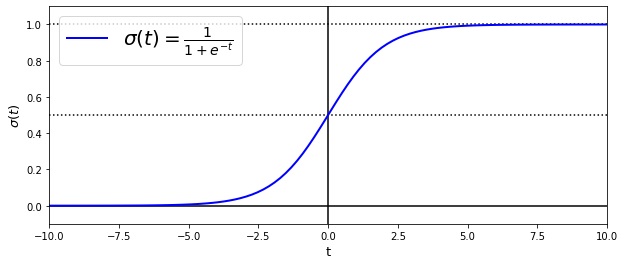

In [67]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(10, 4))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t", fontsize=13)
plt.ylabel(r"$\sigma(t)$", fontsize=13)
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

Once the Logistic Regression model has estimated the probability $\hat{p} = h_{\theta}(\mathbf{x})$ that an instance $\mathbf{x}$ belongs to the positive class, it can make its prediction $\hat{y}$ easily:

$$
\hat{y} = \begin{cases}
 0 & \textrm{if}\  \hat{p} < 0.5 \\    
 1 & \textrm{if}\  \hat{p} \geq 0.5 \\     
\end{cases}
$$


Notice that $\sigma(t) < 0.5$ when $t < 0$, and $\sigma(t) \geq 0.5$ when $t \geq 0$, so a Logistic Regression model predicts 1 if $\mathbf{\theta}^\intercal \mathbf{x}$ is positive and 0 if it is negative.

-------

The score $t$ is often called the logit. The name comes from the fact that the logit function, defined as $\text{logit}(p) = log(p / (1 – p))$, is the inverse of the logistic function. Indeed, if you compute the logit of the estimated probability $p$, you will find that the result is $t$. The logit is also called the log-odds, since it is the log of the ratio between the estimated probability for the positive class and the estimated probability for the negative class.

-------

#### Training and Cost Function

The objective of training is to set the parameter vector $\mathbf{\theta}$ so that the model estimates high probabilities for positive instances $(y = 1)$ and low probabilities for negative instances $(y = 0)$. This idea is captured by the cost function shown below for a single training instance $\mathbf{x}$:

$$
c(\mathbf{\theta}) = \begin{cases} 
    -\log(\hat{p}) & \text{if} \ y = 1 \\ 
    -\log(1 - \hat{p}) & \text{if} \ y = 0 \\ 
\end{cases}
$$


This cost function makes sense because $–log(t)$ grows very large when $t$ approaches $0$, so the cost will be large if the model estimates a probability close to $0$ for a positive instance, and it will also be very large if the model estimates a probability close to $1$ for a negative instance. On the other hand, $–log(t)$ is close to $0$ when $t$ is close to $1$, so the cost will be close to $0$ if the estimated probability is close to $0$ for a negative instance or close to $1$ for a positive instance, which is precisely what we want.

The cost function over the whole training set is the average cost over all training instances. It can be written in a single expression called the log loss, shown below: 

$$
J(\mathbf{\theta}) = -\frac{1}{m}\sum_{i=1}^m\big[y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)})\log(1 - \hat{p}^{(i)})\big]
$$

The bad news is that there is no known closed-form equation to compute the value of $\theta$ that minimizes this cost function (there is no equivalent of the Normal Equation). The good news is that this cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough). The partial derivatives of the cost function with regard to the $j^{th}$ model parameter $\theta_j$ are given by: 

$$
\frac{\partial}{\partial \theta_j}J(\mathbf{\theta}) = \frac{1}{m}\sum_{i = 1}^m \bigg(\sigma(\mathbf{\theta}^\intercal\mathbf{x}^{(i)}) - y^{(i)} \bigg)x^{(i)}_j
$$


This equation looks very much like the gradient descent derivative above: for each instance it computes the prediction error and multiplies it by the $j^{th}$ feature value, and then it computes the average over all training instances. Once you have the gradient vector containing all the partial derivatives, you can use it in the Batch Gradient Descent algorithm. That's it: you now know how to train a Logistic Regression model. For Stochastic GD you would take one instance at a time, and for Mini-batch GD you would use a mini-batch at a time.

### Decision Boundaries


Let's use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: *Iris setosa*, *Iris versicolor*, and *Iris virginica*. 


Let's try to build a classifier to detect the Iris virginica type based only on the petal width feature. First let's load the data:


In [68]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [71]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [75]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [76]:
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [78]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

In [87]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Lets try a logistic regression

In [88]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", 
                             random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

Let's look at the model's estimated probabilities for flowers with petal widths varying from 0 cm to 3 cm:

/Users/valdirsalustino/Documents/git/ml-studies/venv/lib/python3.9/site-packages/matplotlib/patches.py:1450: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


(0.0, 3.0, -0.02, 1.02)

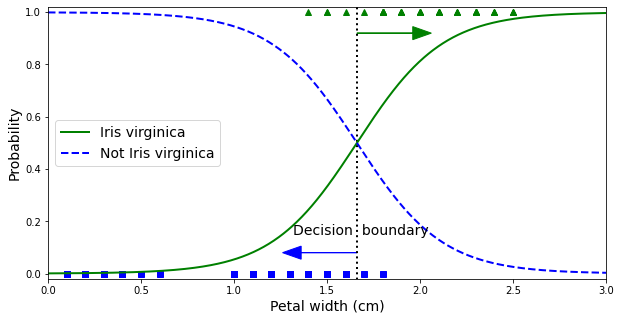

In [95]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
# plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
# plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")


decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(10, 5))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

The petal width of Iris virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap. Above about 2 cm the classifier is highly confident that the flower is an Iris virginica (it outputs a high probability for that class), while below 1 cm it is highly confident that it is not an Iris virginica (high probability for the "Not Iris virginica" class). In between these extremes, the classifier is unsure. However, if you ask it to predict the class (using the predict() method rather than the predict_proba() method), it will return whichever class is the most likely. Therefore, there is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris virginica, and otherwise it will predict that it is not (even if it is not very confident):



In [97]:
decision_boundary

array([1.66066066])

In [96]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Figure below shows the same dataset, but this time displaying two features: petal width and length.

/var/folders/3k/ygg3vn45023cy__b9wy47t0r0000gn/T/ipykernel_14636/936512914.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


(2.9, 7.0, 0.8, 2.7)

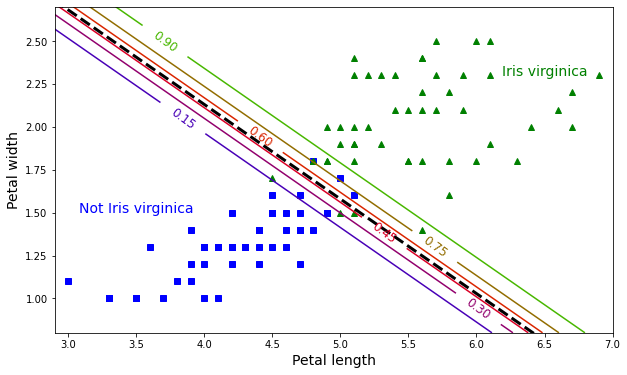

In [123]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 6))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

Once trained, the Logistic Regression classifier can, based on these two features, estimate the probability that a new flower is an Iris virginica. The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. Note that it is a linear boundary.16 Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right). All the flowers beyond the top-right line have an over 90% chance of being Iris virginica, according to the model.


Just like the other linear models, Logistic Regression models can be regularized using $\ell_1$ or $\ell_2$ penalties. Scikit-Learn actually adds an $\ell_2$ penalty by default.


---

The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other linear models), but its inverse: `C`. The higher the value of `C`, the less the model is regularized.

---


### Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression.

The idea is simple: when given an instance $\mathbf{x}$, the Softmax Regression model first computes a score $s_k(\mathbf{x})$ for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores. The equation to compute $s_k(\mathbf{x})$ should look familiar, as it is just like the equation for Linear Regression prediction:


Softmax score for class $k$
$$
s_k(\mathbf{x}) = \big(\mathbf{\theta}^{(k)}\big)^\intercal \mathbf{x}
$$

Note that each class has its own dedicated parameter vector $\mathbf{\theta}^{(k)}$. All these vectors are typically stored as rows in a parameter matrix $\mathbf{\theta}$.

Once you have computed the score of every class for the instance $\mathbf{x}$, you can estimate the probability $k$ that the instance belongs to class $k$ by running the scores through the softmax function:

$$
\hat{p}_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{e^{s_k(\mathbf{x})}}{\sum_{j=1}^{K} e^{s_j(\mathbf{x})}}
$$

where 
* $K$ is the number of classes.
* $\mathbf{s}(\mathbf{x})$ is a vector containing the scores of each class for the instance $\mathbf{x}$.
* $\sigma(\mathbf{s}(\mathbf{x}))_k$ is the estimated probability that the instance $\mathbf{x}$ belongs to class $k$, given the scores of each class for that instance.

The function computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials). The scores are generally called logits or log-odds (although they are actually unnormalized log-odds).

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score), as shown below: 


##### Softmax Regression classifier prediction
$$
\hat{y} = \text{argmax}_k \  \sigma(\mathbf{s}(\mathbf{x}))_k = \text{argmax}_k \ s_k(\mathbf{x}) = \text{argmax}_k  \Big(\big(\mathbf{\theta}^{(k)}\big)^\intercal \mathbf{x} \Big)
$$


The argmax operator returns the value of a variable that maximizes a function. In this equation, it returns the value of $k$ that maximizes the estimated probability $\sigma(\mathbf{s}(\mathbf{x}))_k$.


--- 
The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput), so it should be used only with mutually exclusive classes, such as different types of plants. You cannot use it to recognize multiple people in one picture.

---



